In [1]:
import tensorflow as tf
print(tf.__version__)

2024-10-02 05:35:27.131036: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-02 05:35:27.336207: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-02 05:35:27.422283: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-02 05:35:27.775272: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-02 05:35:29.582404: W tensorflow/compiler/tf2

2.17.0


In [2]:
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2024-10-02 05:36:04--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 104.18.42.227, 172.64.145.29, 2606:4700:4400::ac40:911d, ...
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|104.18.42.227|:443... connected.
HTTP request sent, awaiting response... 200 OK
Cookie coming from dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com attempted to set domain to digitaloceanspaces.com
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  2.03MB/s    in 31s     

2024-10-02 05:36:36 (2.15 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [3]:
# ekstraksi pada file zip
import zipfile, os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [4]:
os.listdir('/tmp/images/train')

['clean', 'messy']

In [5]:
os.listdir('/tmp/images/val')

['clean', 'messy']

In [7]:
# augmentasi gambar
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True,shear_range=0.2,fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # direktori data latih
    target_size=(150,150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
    batch_size=4,
    class_mode='binary' # menggunakan binary karena klasifikasi 2 kelas
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # direktori data validasi
    target_size=(150,150), # mengubah resolusi gambar menjadi 150x150 piksel
    batch_size=4,
    class_mode='binary'
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [12]:
# Proses CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1727823158.304787    2462 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727823158.754523    2462 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727823158.754576    2462 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1727823158.756521    2462 cuda_executor.cc:1001] 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 15, 15, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,529,665 (51.61 MB)

 Trainable params: 13,529,665 (51.61 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss='binary_crossentropy', optimizer=tf._optimizers.Adam(), metrics=['accuracy'])

In [16]:
# Latih model
model.fit(
    train_generator,
    steps_per_epoch = 25, # berapa batch yang akan dieksekusi pada setiap epoch
    epochs=20, # tambahkan epochs jika akurasi model belum optimal
    validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
    validation_steps=5, # berapa batch yang akan dieksekusi pada setiap epoch
    verbose=2
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1727823606.890604   10010 service.cc:146] XLA service 0x7f3b9c00bbc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1727823606.890649   10010 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-10-02 06:00:06.965744: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-02 06:00:07.322910: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
I0000 00:00:1727823611.238

25/25 - 8s - 310ms/step - accuracy: 0.4200 - loss: 0.7077 - val_accuracy: 0.5000 - val_loss: 0.6691
Epoch 2/20
25/25 - 0s - 20ms/step - accuracy: 0.5435 - loss: 0.7243
Epoch 3/20


2024-10-02 06:00:13.401265: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-10-02 06:00:13.401333: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-10-02 06:00:13.408334: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-10-02 06:00:13.408398: I tensorflow/core/framework/local_rendezvous.cc:423] Lo

25/25 - 1s - 41ms/step - accuracy: 0.4700 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/20
25/25 - 1s - 24ms/step - accuracy: 0.4674 - loss: 0.6935
Epoch 5/20


2024-10-02 06:00:15.032290: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


25/25 - 1s - 40ms/step - accuracy: 0.6000 - loss: 0.6921 - val_accuracy: 0.5000 - val_loss: 0.6917
Epoch 6/20
25/25 - 0s - 19ms/step - accuracy: 0.5109 - loss: 0.6898
Epoch 7/20


2024-10-02 06:00:16.508756: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5134672717497427890
2024-10-02 06:00:16.513813: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5134672717497427890
2024-10-02 06:00:16.513881: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16631105131296550906


25/25 - 1s - 39ms/step - accuracy: 0.5600 - loss: 0.6837 - val_accuracy: 0.6500 - val_loss: 0.6748
Epoch 8/20
25/25 - 1s - 37ms/step - accuracy: 0.5870 - loss: 0.6724
Epoch 9/20


2024-10-02 06:00:18.436249: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_2]]


25/25 - 1s - 60ms/step - accuracy: 0.3600 - loss: 0.6957 - val_accuracy: 0.7000 - val_loss: 0.6924
Epoch 10/20
25/25 - 1s - 26ms/step - accuracy: 0.6304 - loss: 0.6862
Epoch 11/20


2024-10-02 06:00:20.604270: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16631105131296550906
2024-10-02 06:00:20.604339: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5134672717497427890
2024-10-02 06:00:20.608814: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5134672717497427890
2024-10-02 06:00:20.608880: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16631105131296550906


25/25 - 1s - 49ms/step - accuracy: 0.5700 - loss: 0.6924 - val_accuracy: 0.5000 - val_loss: 0.6974
Epoch 12/20
25/25 - 1s - 23ms/step - accuracy: 0.4457 - loss: 0.7068
Epoch 13/20


2024-10-02 06:00:22.421808: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16631105131296550906
2024-10-02 06:00:22.421877: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5134672717497427890
2024-10-02 06:00:22.426395: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5134672717497427890
2024-10-02 06:00:22.426497: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16631105131296550906


25/25 - 1s - 41ms/step - accuracy: 0.4900 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6907
Epoch 14/20
25/25 - 1s - 21ms/step - accuracy: 0.4891 - loss: 0.6926
Epoch 15/20


2024-10-02 06:00:23.979334: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16631105131296550906
2024-10-02 06:00:23.979413: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5134672717497427890
2024-10-02 06:00:23.984548: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5134672717497427890
2024-10-02 06:00:23.984626: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16631105131296550906


25/25 - 1s - 43ms/step - accuracy: 0.4500 - loss: 0.6951 - val_accuracy: 0.6500 - val_loss: 0.6874
Epoch 16/20
25/25 - 1s - 21ms/step - accuracy: 0.5978 - loss: 0.6888
Epoch 17/20


2024-10-02 06:00:25.606676: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16631105131296550906
2024-10-02 06:00:25.606760: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5134672717497427890
2024-10-02 06:00:25.612552: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
	 [[IteratorGetNext/_4]]
2024-10-02 06:00:25.612606: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5134672717497427890
2024-10-02 06:00:25.612641: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16631105131296550906


25/25 - 1s - 47ms/step - accuracy: 0.6500 - loss: 0.6341 - val_accuracy: 0.7500 - val_loss: 0.6281
Epoch 18/20
25/25 - 1s - 25ms/step - accuracy: 0.6848 - loss: 0.6178
Epoch 19/20


2024-10-02 06:00:27.431128: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5134672717497427890
2024-10-02 06:00:27.431214: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16631105131296550906


25/25 - 1s - 48ms/step - accuracy: 0.7800 - loss: 0.5803 - val_accuracy: 0.8000 - val_loss: 0.5675
Epoch 20/20
25/25 - 1s - 25ms/step - accuracy: 0.6848 - loss: 0.5876


2024-10-02 06:00:29.262409: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16631105131296550906
2024-10-02 06:00:29.262507: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 5134672717497427890
2024-10-02 06:00:29.268687: I tensorflow/core/framework/local_rendezvous.cc:423] Local rendezvous recv item cancelled. Key hash: 16631105131296550906


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[1.]]
Kamar Berantakan


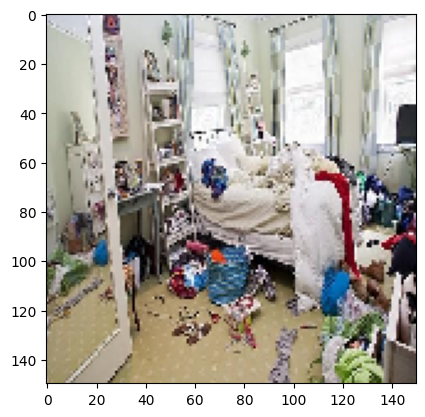

In [41]:
# Prediksi gambar
import numpy as np
# from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# uploaded = files.upload()

# for fn in uploaded.keys():
#     # predictiing images
#     path = fn
#     img = image.load_img(path, target_size=(150,150))
#     imgplot = plt.imshow(img)
#     x = image.img_to_array(img)
#     x = np.expand_dims(x, axis=0)
#     images = np.vstack([x])
    
#     classes = model.predict(images, batch_size=10)
#     print(fn)
#     if classes == 0:
#         print('Kamar Bersih')
#     else:
#         print('Kamar Kotor')

# Specify the path to the image
path_test = "/home/widi/htdocs/Artificial_Intelligence/1.Supervised/8.LatihanKlasifikasiGambar/dataset/test/test2.jpg"
img = image.load_img(path_test, target_size=(150,150))

# Load and predict the image
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)
print(classes)
threshold = 0.5
if classes[0][0] < threshold:
    print('Kamar Rapi')
else:
    print('Kamar Berantakan')